In [1]:
%load_ext watermark
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from API.ES_gt import evolutionary_strategy

In [2]:
%watermark -u -n -t -z -a 'Francisco Zanartu' -v -m -iv

Author: Francisco Zanartu

Last updated: Wed Dec 14 2022 09:53:34ACDT

Python implementation: CPython
Python version       : 3.11.0
IPython version      : 8.6.0

Compiler    : Clang 14.0.4 
OS          : Darwin
Release     : 21.6.0
Machine     : arm64
Processor   : i386
CPU cores   : 8
Architecture: 64bit

pandas    : 1.5.1
sys       : 3.11.0 | packaged by conda-forge | (main, Oct 25 2022, 06:21:25) [Clang 14.0.4 ]
matplotlib: 3.6.2
numpy     : 1.23.4



In [4]:
ds = pd.read_json('/Users/francisco/Library/CloudStorage/GoogleDrive-fzanartua@gmail.com/My Drive/Socialz/COBOL/all_cobol_events_2011_2021.json', lines=True)
ds = ds[ds['type'].isin(['ForkEvent','WatchEvent','PullRequestEvent','PushEvent'])]
ds['year'] = pd.to_datetime(ds['created_at'],format= '%Y-%m-%d %H:%M:%S %Z').dt.year
ds = ds[ds['year']==2021]
ds['actor'] = ds['actor'].apply(lambda x: x.get('login'))
ds['repo'] = ds['repo'].apply(lambda x:x.get('url'))
ds['repo'] = ds['repo'].apply(lambda x: '/'.join(x.split('/')[-2:]))
ds = ds[['actor', 'repo', 'type']].rename(columns={'actor':'source', 'repo':'target'}).reset_index(drop=True)

# Add user (u: ) repo (r: ) indicator for each node
ds['source'] = ds['source'].apply(lambda x: 'u: '+x)
ds['target']  = ds['target'].apply(lambda x: 'r: '+x)

ds

,source,target,type
0,u: stupot1966,r: CPWRGIT/ISPWSA0,PullRequestEvent
1,u: bearou,r: openmainframeproject/cobol-check,WatchEvent
2,u: balu-sn-devops,r: balu-sn-devops/First_repo,PushEvent
3,u: msingh9999,r: msingh9999/GitTXXX,PullRequestEvent
4,u: efhjnw0,r: Compuware-Corp/TotalTest-Test-Repo,PushEvent
...,...,...,...
7688,u: MikeBauerCA,r: openmainframeproject/cobol-programming-course,PullRequestEvent
7689,u: maticurbanija,r: openmainframeproject/cobol-programming-course,WatchEvent
7690,u: michaelsunzy,r: openmainframeproject/cobol-programming-course,WatchEvent
7691,u: MikeBauerCA,r: openmainframeproject/cobol-programming-course,PushEvent


In [8]:
es = evolutionary_strategy(ds, cpus=1)
niter, best, best_eval = es.es_plus(50,1,20)

In [10]:
es.complete_edgelist(ds).value_counts('type')

type
FollowEvent         215689
PushEvent             3646
PullRequestEvent      2080
WatchEvent            1077
ForkEvent              890
dtype: int64

In [ ]:
c = es.complete_edgelist(best)
c.value_counts('type')

In [6]:
best.to_csv('Data/Mutated_dataset.csv', index=False)

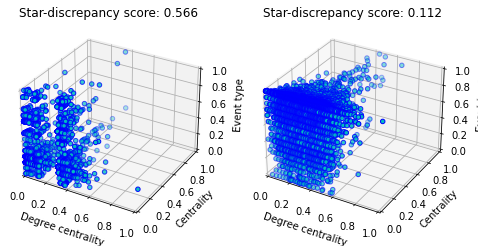

In [9]:
def draw_plot(ax, data):
    
    ax = ax or plt.gca()
    
    aux = es.graph_metrics(data)
    ax.scatter3D(aux['degree'], aux['pagerank'], aux['Values'], edgecolor='b', c='c')
    ax.set_xlabel('Degree centrality')
    ax.set_ylabel('Centrality')
    ax.set_zlabel('Event type')
    ax.set_title(f'Star-discrepancy score: {es.objective(data):.3f}')
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])
    ax.set_zlim([0, 1])
    plt.close()
    
    return ax


fig, ((ax1,ax2)) = plt.subplots(1,2, figsize=(8,4), subplot_kw=dict(projection="3d"))
ax1 = draw_plot(ax1, ds)
ax2 = draw_plot(ax2, best)
plt.close()

fig

In [3]:
df = pd.read_csv('Data/cobol_pullrequests.csv', usecols= ['login','name'])

# Add user (u: ) repo (r: ) indicator for each node
df['login'] = df['login'].apply(lambda x: 'u: '+x)
df['name']  = df['name'].apply(lambda x: 'r: '+x)

#Rename columns
df = df.rename(columns={"login":"source","name":"target"})
df['type'] = np.random.choice(['ForkEvent','WatchEvent','PullRequestEvent','PushEvent'],1333)
df

,source,target,type
0,u: vim-sroberge,r: vimaec/g3d,ForkEvent
1,u: vim-sroberge,r: vimaec/g3d,WatchEvent
2,u: vim-sroberge,r: vimaec/g3d,PushEvent
3,u: vim-sroberge,r: vimaec/g3d,PullRequestEvent
4,u: mavimaec,r: vimaec/g3d,PushEvent
...,...,...,...
1328,u: joe-tingsanchali-sonarsource,r: SonarSource/sonar-scanning-examples,PushEvent
1329,u: joe-tingsanchali-sonarsource,r: SonarSource/sonar-scanning-examples,ForkEvent
1330,u: joe-tingsanchali-sonarsource,r: SonarSource/sonar-scanning-examples,WatchEvent
1331,u: joe-tingsanchali-sonarsource,r: SonarSource/sonar-scanning-examples,ForkEvent


In [4]:
es = evolutionary_strategy(df, cpus=8)

In [5]:
niter, best, best_eval = es.es_plus(1000, 1, 20)

14-Nov-22 20:07:46 - n_iter: 0, best_score: 0.26832, sample_size: 4
14-Nov-22 20:07:47 - n_iter: 1, best_score: 0.25804, sample_size: 5
14-Nov-22 20:07:48 - n_iter: 2, best_score: 0.24971, sample_size: 6
14-Nov-22 20:07:49 - n_iter: 3, best_score: 0.24297, sample_size: 8
14-Nov-22 20:07:50 - n_iter: 4, best_score: 0.22985, sample_size: 13
14-Nov-22 20:07:51 - n_iter: 5, best_score: 0.21536, sample_size: 31
14-Nov-22 20:07:52 - n_iter: 6, best_score: 0.20798, sample_size: 49
14-Nov-22 20:07:53 - n_iter: 7, best_score: 0.20374, sample_size: 130
14-Nov-22 20:07:55 - n_iter: 8, best_score: 0.20374, sample_size: 238
14-Nov-22 20:07:57 - n_iter: 9, best_score: 0.20374, sample_size: 131
14-Nov-22 20:07:58 - n_iter: 10, best_score: 0.20374, sample_size: 64
14-Nov-22 20:08:00 - n_iter: 11, best_score: 0.20374, sample_size: 36
14-Nov-22 20:08:01 - n_iter: 12, best_score: 0.20374, sample_size: 10
14-Nov-22 20:08:02 - n_iter: 13, best_score: 0.19690, sample_size: 9
14-Nov-22 20:08:02 - n_iter: 14,

In [6]:
es.combinations

{('ForkEvent',): 1,
 ('WatchEvent',): 2,
 ('PushEvent',): 3,
 ('PullRequestEvent',): 4,
 ('ForkEvent', 'WatchEvent'): 5,
 ('ForkEvent', 'PushEvent'): 6,
 ('ForkEvent', 'PullRequestEvent'): 7,
 ('PushEvent', 'WatchEvent'): 8,
 ('PullRequestEvent', 'WatchEvent'): 9,
 ('PullRequestEvent', 'PushEvent'): 10,
 ('ForkEvent', 'PushEvent', 'WatchEvent'): 11,
 ('ForkEvent', 'PullRequestEvent', 'WatchEvent'): 12,
 ('ForkEvent', 'PullRequestEvent', 'PushEvent'): 13,
 ('PullRequestEvent', 'PushEvent', 'WatchEvent'): 14,
 ('ForkEvent', 'PullRequestEvent', 'PushEvent', 'WatchEvent'): 15}

In [ ]:
df = pd.read_csv('Data/cobol_pullrequests.csv', usecols= ['login','name'])

# Add user (u: ) repo (r: ) indicator for each node
df['login'] = df['login'].apply(lambda x: 'u: '+x)
df['name']  = df['name'].apply(lambda x: 'r: '+x)

#Rename columns
df = df.rename(columns={"login":"source","name":"target"})
df

,source,target
0,u: vim-sroberge,r: vimaec/g3d
1,u: vim-sroberge,r: vimaec/g3d
2,u: vim-sroberge,r: vimaec/g3d
3,u: vim-sroberge,r: vimaec/g3d
4,u: mavimaec,r: vimaec/g3d
...,...,...
1328,u: joe-tingsanchali-sonarsource,r: SonarSource/sonar-scanning-examples
1329,u: joe-tingsanchali-sonarsource,r: SonarSource/sonar-scanning-examples
1330,u: joe-tingsanchali-sonarsource,r: SonarSource/sonar-scanning-examples
1331,u: joe-tingsanchali-sonarsource,r: SonarSource/sonar-scanning-examples


In [ ]:
es = evolutionary_strategy(df, cpus=8)
niter, best, best_eval = es.es_plus(1000, 1, 20)

09-Nov-22 08:31:52 - n_iter: 0, score: 0.53291
09-Nov-22 08:31:52 - n_iter: 1, score: 0.52256
09-Nov-22 08:31:53 - n_iter: 2, score: 0.51238
09-Nov-22 08:31:53 - n_iter: 3, score: 0.49945
09-Nov-22 08:31:53 - n_iter: 4, score: 0.48665
09-Nov-22 08:31:53 - n_iter: 5, score: 0.47565
09-Nov-22 08:31:54 - n_iter: 6, score: 0.46286
09-Nov-22 08:31:54 - n_iter: 7, score: 0.45320
09-Nov-22 08:31:55 - n_iter: 8, score: 0.44330
09-Nov-22 08:31:55 - n_iter: 9, score: 0.43349
09-Nov-22 08:31:55 - n_iter: 10, score: 0.42411
09-Nov-22 08:31:56 - n_iter: 11, score: 0.41583
09-Nov-22 08:31:56 - n_iter: 12, score: 0.41363
09-Nov-22 08:31:56 - n_iter: 13, score: 0.41119
09-Nov-22 08:31:57 - n_iter: 14, score: 0.39976
09-Nov-22 08:31:57 - n_iter: 15, score: 0.39257
09-Nov-22 08:31:57 - n_iter: 16, score: 0.38741
09-Nov-22 08:31:58 - n_iter: 17, score: 0.38136
09-Nov-22 08:31:58 - n_iter: 18, score: 0.37742
09-Nov-22 08:31:59 - n_iter: 19, score: 0.37444
09-Nov-22 08:31:59 - n_iter: 20, score: 0.37255
09

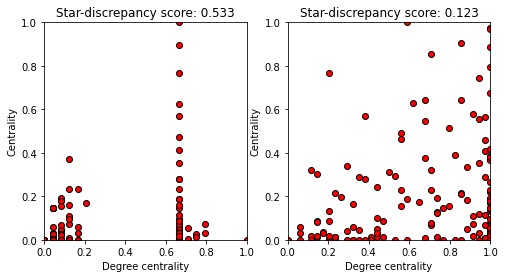

In [ ]:
def draw_plot(ax, data):
    
    ax = ax or plt.gca()
    
    aux = es.graph_metrics(data)
    ax.scatter(aux['Degree'], aux['Centrality'], edgecolor='k', c='r')
    ax.set_xlabel('Degree centrality')
    ax.set_ylabel('Centrality')
    ax.set_title(f'Star-discrepancy score: {es.objective(data):.3f}')
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])
    plt.close()
    
    return ax


fig, (ax1,ax2) = plt.subplots(1,2, figsize=(8,4))
ax1 = draw_plot(ax1, df)
ax2 = draw_plot(ax2, best)
plt.close()

fig